# SWMAL Exercise


##  Artificial Neural Networks

Afprøv Scikit-learns version af supervised neural network – mere specifikt arbejder vi her med 2-lags Multi Layer Perceptron (klassisk feedforward ANN, der findes mange andre typer ANNs). Scikit Learns funktion til regression hedder MLPRegression.

Vi antager at I har fået data, som beskrevet i næste celle,

[array([[-1.99954493, -2.00005582]]), array([[ 3.00002663],
       [-1.99999215]])]
[array([ 3.9991422 , 12.00023218]), array([-1.84130956e-05])]


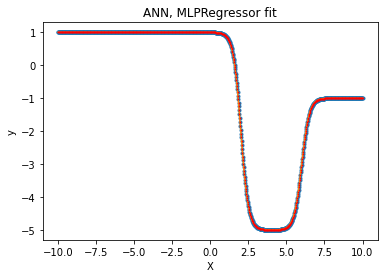

In [1]:
# Data and plot generation for ANN Exercise..

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import numpy as np

# %% data
X = np.linspace(-10,10,1000)
y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)

plt.plot(X, y, '.')

X = X.reshape(-1,1) # Scikit-algoritmer kræver (:,1)-format

#%% fit model
mlp = MLPRegressor(activation = 'tanh',    # aktiveringsfunktion 
                   hidden_layer_sizes = 2, # antal skjulte neuroner
                   alpha = 1e-5,           # regulariseringsparameter, her meget lille
                   solver = 'lbfgs',       # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)
mlp.fit(X, y)

plt.plot(X ,y, label="org data")
plt.plot(X, mlp.predict(X), 'rx', ms=1, label="predictet")
plt.xlabel('X')
plt.ylabel('y')

plt.title("ANN, MLPRegressor fit")
plt.savefig("./plt.png", dpi=300, format="png")
print(mlp.coefs_)      # w-parametre
print(mlp.intercepts_) # = bias led

Dvs. feature 

    X = np.linspace(-10,10,1000)

og output værdi 

    y = np.sinc(X)
    
altså en såkaldt `sinc`-funktion (Bemærk – det her er blot til illustration af, at MLP regressionsmodeller kan fitte vilkårlige funktioner, og også i flere dimensioner). Opgaven er nu at ”lære”/”træne” netværket til dette output.

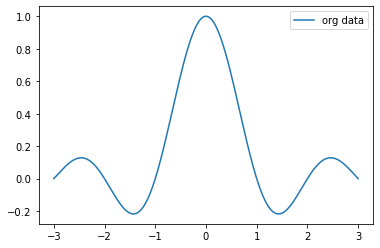

In [2]:
# Data
X = np.linspace(-3,3,1000)
y = np.sinc(X)

# Plot org data
plt.plot(X, y, label="org data")
plt.legend()
plt.savefig("./sinc.png", dpi=300, format="png")

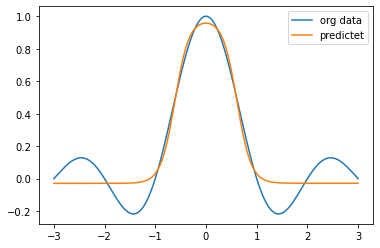

In [3]:
# Fit data 
X = X.reshape(-1,1)
mlp = MLPRegressor(activation = 'tanh',    # aktiveringsfunktion 
                   hidden_layer_sizes = 2, # antal skjulte neuroner
                   alpha = 1e-5,           # regulariseringsparameter, her meget lille
                   solver = 'lbfgs',       # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)
mlp.fit(X, y)

# Compare the result to org
plt.plot(X, y, label="org data")
plt.plot(X, mlp.predict(X), label="predictet")
plt.legend()
plt.savefig("./pred.png", dpi=300, format="png")

[array([[3.5790123 , 3.56919846]]), array([[ 0.50594204],
       [-0.50559246]])]
[array([ 2.19725356, -2.17995044]), array([-0.02872333])]


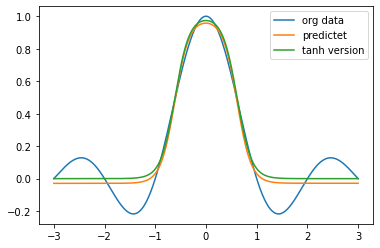

In [4]:
# Write in tanh

print(mlp.coefs_)      # w-parametre
print(mlp.intercepts_) # = bias led

# As the model changes each time, we use the result from a certain run
    # mlp.coefs_ = [array([[3.56584643, 3.56917215]]), array([[ 0.50619841],
    #                      [-0.50616689]])]
    # mlp.intercepts_ = [array([ 2.18114529, -2.18423669]), array([-0.02879072])]

# Setup the 2 tanh parts
part1 = 0.5*np.tanh(-3.51*X+2.15)
part2 = 0.5*np.tanh(3.55*X+2.17)

new_y = part1 + part2

plt.plot(X, y, label="org data")
plt.plot(X, mlp.predict(X), label="predictet")
plt.plot(X, new_y, label="tanh version")
plt.legend()
plt.savefig("./tanh.png", dpi=300, format="png")

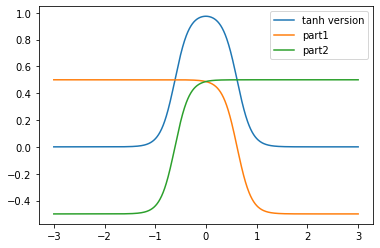

In [5]:
plt.plot(X, new_y, label="tanh version")

# Plot individual parts
plt.plot(X, part1, label="part1")
plt.plot(X, part2, label="part2")
plt.legend()
plt.savefig("./tanh2.png", dpi=300, format="png")

[array([[-0.43238777,  0.92447002]]), array([[ 1.26477848,  4.41735854],
       [-0.8313792 ,  1.21804056]]), array([[ 0.11407553,  2.04936995],
       [-0.44608187,  3.59401114]]), array([[-2.71819101, -0.69059809],
       [-0.05681086, -0.49699121]]), array([[-1.74342952, -4.159858  ],
       [-1.91205444, -2.24959775]]), array([[5.73094571],
       [2.60649153]])]
[array([ 0.89124722, -1.05052962]), array([-1.58338339, -3.35371534]), array([-0.31669711,  0.70494822]), array([-0.8981001 ,  0.90221266]), array([ 0.39161392, -0.71360238]), array([-0.1744786])]


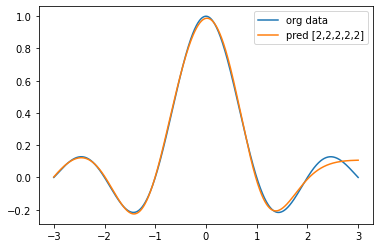

In [18]:
mlp = MLPRegressor(activation = 'tanh',    # aktiveringsfunktion 
                   hidden_layer_sizes = (2, 2, 2, 2, 2), # antal skjulte neuroner
                   alpha = 1e-5,           # regulariseringsparameter, her meget lille
                   solver = 'lbfgs',       # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)
mlp.fit(X, y)
print(mlp.coefs_)      # w-parametre
print(mlp.intercepts_) # = bias led
plt.plot(X, y, label="org data")
plt.plot(X, mlp.predict(X), label="pred [2,2,2,2,2]")
plt.legend()
plt.savefig("./extra.png", dpi=300, format="png")

#### Qa)

Fit modellen til data. Benyt i starten kun 2 skjulte neuroner (hidden_layer_sizes)

#### Qb)

Tegn den grafiske model for netværket, gerne blot en håndtegning. Skriv vægtenes værdi på grafen. Husk bias.

#### Qc)

Opskriv udtrykket for y – dvs. i stil med 

    y = 0.3* tanh(2 * x + 0.1) + 0.3 * tanh(5 * x + 3) + 1. 
    
OBS: I kan godt nøjes med f.eks. 1-2 betydende decimaler.

#### Qd)

Plot funktionen vha. `np.tanh` – dvs. i stil med 

    y = 0.3*np.tanh(2 * X + ..
   
hvor `X` er input data.

#### Qe)

Plot også første del af funktionen samt anden del, hver for sig (f.eks. `0.3* tanh(2 * X + 0.1)` og `0.3 * tanh(5 * X + 3)`) – summen af disse to skal jo gerne give den samlede funktion (pånær bias- leddet)

#### Qf)

Prøv også at fitte funktionen med flere led (f.eks. 5). Plot resultatet.

####  [OPTIONAL] Qg) 

Optional : Prøv at ændre alpha til f.eks. `1e5` og `1e-1` – forklar hvad der sker (tip: regularisering).

Tips : I kan tage udgangspunkt i koden til denne uge, også til fitting af modellen. I kan blot ændre f.eks. hidden_layer_sizes.

OBS: Når I laver dybe neurale netværk (DNN) – herunder CNN etc., så er det nok bedre at bruge andre biblioteker såsom Keras. Men Scikit learns funktion er ret simpel og god til denne opgave.

In [7]:
# TODO: ANN implemetation..

REVISIONS||
---------||
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.